In [36]:
import pandas as pd
import numpy as np

In [37]:
babyNamesDF=pd.read_csv("babyNames.csv")

In [38]:
# review of sorting data frame by a column
babyNamesDF.sort_values('Year', ascending=False)

,State,Sex,Year,Name,Count
387780,CA,M,2019,Ziyad,5
226042,CA,F,2019,Jaliyah,23
226068,CA,F,2019,Arie,22
226067,CA,F,2019,Alba,22
226066,CA,F,2019,Aiza,22
...,...,...,...,...,...
228611,CA,M,1910,Guadalupe,5
228610,CA,M,1910,Franklin,5
228609,CA,M,1910,Floyd,5
228608,CA,M,1910,Eddie,5


In [39]:
# using Lambda
babyNamesDF.groupby('Name').agg(lambda x: x.iloc[0])

,State,Sex,Year,Count
Name,,,,
Aadan,CA,M,2008,7
Aadarsh,CA,M,2019,6
Aaden,CA,M,2007,20
Aadhav,CA,M,2014,6
Aadhira,CA,F,2017,6
...,...,...,...,...
Zylah,CA,F,2008,5
Zyler,CA,M,2011,5
Zyon,CA,M,1999,6


In [40]:
# what does the lambda function do above?
# Sample DataFrame
dataWhat = {
    'Name': ['Alice', 'Bob', 'Alice', 'Bob', 'Charlie'],
    'Year': [2000, 2001, 2002, 2003, 2004],
    'Count': [10, 15, 20, 25, 30]
}
namesWhatDF = pd.DataFrame(dataWhat)
namesWhatDF


,Name,Year,Count
0,Alice,2000,10
1,Bob,2001,15
2,Alice,2002,20
3,Bob,2003,25
4,Charlie,2004,30


In [41]:
# Group by 'Name' and aggregate by taking the first element of each group
resultWhat = namesWhatDF.groupby('Name').agg(lambda x: x.iloc[0])

In [42]:
print(resultWhat)

         Year  Count
Name                
Alice    2000     10
Bob      2001     15
Charlie  2004     30


In [43]:
rows, columns = babyNamesDF.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 387781
Number of columns: 5


In [44]:
# using more functions on groupby
# you can see which baby names are out-liers
babyNamesDF.groupby('Name').size().sort_values().head(30)

Name
Geraldy     1
Mayline     1
Chenay      1
Maylyn      1
Maylynn     1
Maysen      1
Maytte      1
Mayuri      1
Chelle      1
Chelesa     1
Chelcy      1
Chelby      1
Chela       1
Cheenou     1
Mckynlee    1
Mckynzie    1
Mayli       1
Chenin      1
Maygan      1
Mayer       1
Huber       1
Farbod      1
Cheron      1
Maxene      1
Maxi        1
Cherly      1
Cherlene    1
Medhansh    1
Maxima      1
Cherisa     1
dtype: int64

In [45]:
# perhaps


In [46]:
# perhaps to look at the baby data differently by year and ignore the name
babyNamesDF.groupby(['Year', 'Sex']).agg({"Count": sum}).sort_values("Year")

Count
Year Sex        
1910 F      5950
     M      3213
1911 F      6602
     M      3381
1912 F      9803
...          ...
2017 M    215178
2018 F    188786
     M    205766
2019 F    183036
     M    201424

[220 rows x 1 columns]

<Axes: xlabel='Year,Sex'>

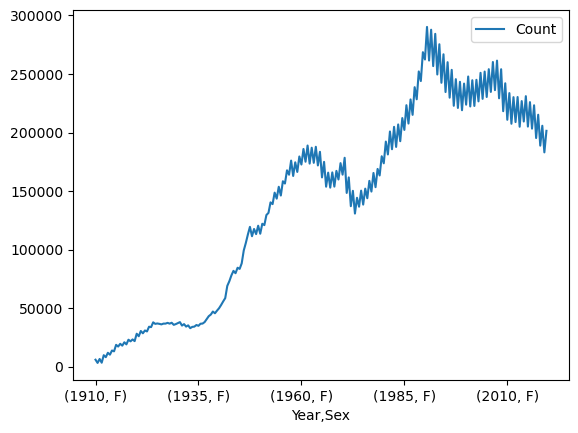

In [47]:
babyNamesDF.groupby(['Year', 'Sex']).agg({"Count": sum}).plot()

In [48]:
# suppose we wanted to filter the group by data and only use groups where the 
# data size is greater than X

#babyNamesDF.groupby('Name').filter(lambda x: x['Count'].size() > 2.)
babyGroup = babyNamesDF.groupby('Name')
babyGroup.filter(lambda x: x['Count'].mean() > 3.)

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
387776,CA,M,2019,Zayvion,5
387777,CA,M,2019,Zeek,5
387778,CA,M,2019,Zhaire,5
387779,CA,M,2019,Zian,5


In [49]:
babyGroup.filter(lambda x: x['Count'].sum() > 1.)
# this will return names groups that have a single name

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
387776,CA,M,2019,Zayvion,5
387777,CA,M,2019,Zeek,5
387778,CA,M,2019,Zhaire,5
387779,CA,M,2019,Zian,5


In [50]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar'],
                   'B' : [1, 2, 3, 4, 5, 6],
                   'C' : [2.0, 5., 8., 1., 2., 9.]})

In [51]:
df

,A,B,C
0,foo,1,2.0
1,bar,2,5.0
2,foo,3,8.0
3,bar,4,1.0
4,foo,5,2.0
5,bar,6,9.0


In [52]:
grouped = df.groupby('A')


In [53]:

df.groupby('A').size()


A
bar    3
foo    3
dtype: int64

In [54]:
df.groupby('A').agg(sum)

,B,C
A,,
bar,12,15.0
foo,9,12.0


In [55]:
grouped.filter(lambda x: x['B'].mean() > 3.)

,A,B,C
1,bar,2,5.0
3,bar,4,1.0
5,bar,6,9.0
